<a href="https://colab.research.google.com/github/silvilio/titanic/blob/main/Titanic_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic




#### <span style="color:Lightsalmon">Importamos las librerías necesarias.</span>  

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
%matplotlib inline

import csv
import os
import requests

In [110]:
!pip install plotly_express
import plotly_express as px

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<hr color="#FFA07A">

#### <span style="color:Lightsalmon">Leemos el data set, creamos el dataframe y observamos qué contiene.</span> 

In [111]:
df = pd.read_csv(r"/content/Titanic/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<hr color="#FFA07A">

### <span style="color:Lightsalmon"> Leyenda <br/> </span> 
- PassengerId - número de pasajero <br/>
- Survived - supervivencia <br/>
- Pclass - clase de pasajero <br/>
- Name - nombre <br/>
- Sex  - sexo <br/>
- Age - edad <br/>
- SibSp - número de conyuges y/o hermanos a bordo <br/>
- Parch - número de padres y/o hijos a bordo <br/>
- Ticket - número del billete <br/>
- Fare - coste del billete <br/>
- Cabin - número de camarote <br/>
- Embarked - puerto de embarque <br/>

<hr color="#FFA07A">


# <span style="color:Brown">COMENZAMOS NUESTRO ANÁLISIS EXPLORATORIO</span>  

#### <span style="color:Lightsalmon">Consultamos la cantidad de columnas y filas que tiene el data set.</span>  

In [112]:
df.shape

(891, 12)

<hr color="#FFA07A">

#### <span style="color:Lightsalmon">Vemos el nombre y cantidad de todas las columnas.</span>  

In [113]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<hr color="#FFA07A">

#### <span style="color:Lightsalmon">Cantidad de registros que tiene el DataFrame.</span>  

In [114]:
df.size

10692

#### <span style="color:Lightsalmon">Obtenemos una breve descripción de lo que contiene el dataset.</span>  

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<hr size=1 color="#FFA07A" align="left" >

#### <span style="color:Lightsalmon">Completamos la información rápida con .describe() para hacernos una idea global.</span>  

In [116]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<hr color="#FFA07A">

# <span style="color:Brown">COMENZAMOS LA REPARACIÓN DEL DATASET</span>  

#### <span style="color:Lightsalmon">Preguntamos qué columnas tienen valores nulos.</span>  

In [117]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

<hr color="#FFA07A">

#### <span style="color:Lightsalmon">Vemos la cantidad de valores nulos por columna.</span>  

In [118]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<hr color="#FFA07A">

#### <span style="color:Lightsalmon">Vemos el porcentaje de valores nulos por columna.</span>  

In [119]:
porcentaje_nulos = df.isnull().sum() *100 / len(df)
print(porcentaje_nulos.round(2))


PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64


<hr color="#FFA07A">

#### <span style="color:Lightsalmon">Los valores nulos representados gráficamente.</span>  

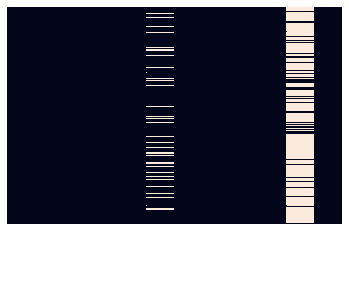

In [120]:
sns.heatmap(data=df.isnull(), yticklabels= False , cbar=False);

<hr color="#FFA07A">

#### <span style="color:Lightsalmon">Empezamos reparando los valores nulos de la columna "Age".</span>  
En este caso, he querido rellenar los valores nulos del campo "Age" con la edad promedio de las personas que pertenezcan a la misma clase.


In [121]:
df[(df["Age"].notna())].groupby(["Pclass"])["Age"].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

Anteriormente he extraido la edad media de la suma de los pasajeros por su clase y, a continuación, con una función lambda y .fillna() reparamos los valores. Hubiera sido más rápido reparar los valores con la media de todos los pasajeros, pero diferenciándolos por clases considero que me ajusto algo más a la realidad.  

In [122]:
df["Age"] = df.groupby(["Pclass"])["Age"].transform(lambda x: x.fillna(x.mean()))

<hr color="#FFA07A">

#### <span style="color:Lightsalmon"> Continuamos reparando los valores nulos de la columna "Cabin".</span>  

El porcentaje de valores a reparar del campo "Cabin" es demasiado alto. Considero este campo no relevante para nuestro análisis y procedo a borrar la columna al completo.

In [123]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [124]:
df = df.drop("Cabin", axis=1)

Observamos que la columna "Cabin" ha sido eliminada correctamente.

In [125]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


<hr color="#FFA07A">

#### <span style="color:Lightsalmon"> Por último, vamos a reparar los 2 valores del último campo, "Embarked".</span>  

Para ello usaremos la moda. Los dos valores ausentes serán sustituidos por el valor más repetido.

In [126]:
print(df["Embarked"].mode())
print("__________________________")
print(df["Embarked"].value_counts())
# Lo comprobamos de las dos maneras

0    S
dtype: object
__________________________
S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [127]:
df["Embarked"] = df["Embarked"].fillna("S")

#### <span style="color:Lightsalmon"> Observamos que todos los valores nulos están reparados.</span>  

In [128]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [129]:
df["Embarked"].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

<hr color="#FFA07A">

#### <span style="color:Lightsalmon"> A continuación, eliminaremos el índice por defecto para hacer que la columna "PasserngerId" sea nuestro nuevo índice.</span>  

In [130]:
df = df.set_index("PassengerId")

In [131]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<hr color="#FFA07A">

#### <span style="color:Lightsalmon"> Por último, modificaremos la tabla "Fare" para que contenga únicamente dos decimales al ser dinero.</span>  

In [132]:
df["Fare"] = df["Fare"].round(2)
df["Fare"].head(2)

PassengerId
1     7.25
2    71.28
Name: Fare, dtype: float64

# <span style="color:Brown">CONTINUAMOS CON LA EXPLORACIÓN DE DATOS</span>  

#### <span style="color:Lightsalmon"> Cantidad de pasajeros en nuestro dataset.</span>  

In [133]:
len(df)

891

<hr color="#FFA07A">

#### <span style="color:Lightsalmon"> Distribución de pasajeros por su género.</span>  

In [134]:
df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [135]:
fig_sex = px.pie(df, names = "Sex", color = "Sex", hole=.2, color_discrete_map = {"Male": 'red', "Female": 'cyan'})
fig_sex.update_traces(text = df["Sex"].value_counts(), textinfo = "label+percent+text")
fig_sex.update_layout(title_text = "Distribución por género", title_x = 0.5)
fig_sex.show()

<hr color="#FFA07A">

#### <span style="color:Lightsalmon"> Distribución de pasajeros por su clase.</span>  

In [136]:
df["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

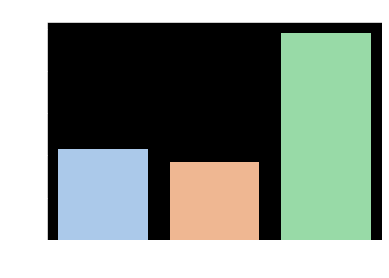

In [137]:
ax = sns.countplot(x="Pclass", data=df, palette="pastel")
plt.style.use("dark_background")
style="darkgrid"
#ax.bar_label(ax.containers[0])
ax.set_title("Distribución de pasajeros por su clase");

#### <span style="color:Lightsalmon"> Distribución de pasajeros por su clase y género.</span>  

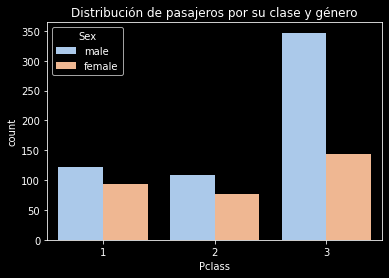

In [138]:
ax = sns.countplot(x="Pclass", data=df, palette="pastel", hue= "Sex")
plt.style.use("dark_background")
style="darkgrid"
# ax.bar_label(ax.containers[0])
# ax.bar_label(ax.containers[1])

ax.set_title("Distribución de pasajeros por su clase y género");


<hr color="#FFA07A">

#### <span style="color:Lightsalmon"> Información de las edades de los pasajeros.</span>  

In [139]:
print("El pasajeros del Titanic con menor edad tenía {} años de edad, mientras que el de mayor edad tenía {} años.".format(df["Age"].min(), df["Age"].max()))

El pasajeros del Titanic con menor edad tenía 0.42 años de edad, mientras que el de mayor edad tenía 80.0 años.


In [140]:
fig_age = px.histogram(df, x = "Age", nbins=15,text_auto=True,
    title="Distribución de los pasajeros por edades",

    opacity=0.7,
    color_discrete_sequence=['indianred'],
    template="plotly_dark"
)
fig_age.update_layout(
    xaxis_title="Rangos de edad",
    yaxis_title="Frecuencia"
)

fig_age.show()

In [141]:
fig_age = px.histogram(df, x = "Age", color= "Sex", nbins=15,text_auto=True,
    title="Distribución de los pasajeros por edades y género",

    opacity=0.7,
    #color_discrete_sequence=['indianred'],
    template="plotly_dark"
)
fig_age.update_layout(
    xaxis_title="Rangos de edad",
    yaxis_title="Frecuencia"
)

fig_age.show()

<hr color="#FFA07A">

#### <span style="color:Lightsalmon"> Distribución de los embarques de cada pasajero.</span>  

In [142]:
fig_embarked = go.Figure(data=[go.Pie(labels=df["Embarked"], pull=[0.1, 0.1, 0.2])])
      
       
fig_embarked.update_layout(

          title=go.layout.Title(
        text="Distribución de los diferentes embarques <br><br><sup>S - Southampton<br>C - Cherbourg<br>Q - Queenstown </sup>",
        xref="paper",
        x=0
    )
 )

fig_embarked.show()

<hr color="#FFA07A">

#### <span style="color:Lightsalmon"> Distribución de los pasajeros según el precio de su billete.</span>  

In [143]:
fig_fare = px.scatter(df, x = "Fare",
    title="Distribución de los pasajeros según el precio de su billete",

    opacity=1,
    color_discrete_sequence=['indianred'],
    template="plotly_dark"
)
fig_fare.update_layout(
    xaxis_title="Precio del billete",
    yaxis_title="Frecuencia"
)

fig_fare.show()

In [144]:
fig_fare2 = px.histogram(df, x = "Fare", range_x=(0,550), nbins=15,
    title="Precio de los billetes",

    opacity=0.7,
    color_discrete_sequence=['indianred'],
    template="plotly_dark"
)
fig_fare2.update_layout(
    xaxis_title="Precio de los billetes",
    yaxis_title="Pasajeros que lo compraron"
)

fig_fare2.show()

<hr color="#FFA07A">

#### <span style="color:Lightsalmon"> Precio del billete según la clase del pasajero.</span>  

In [145]:
fig2 = px.scatter(df, x="Fare", y="Pclass", color = "Sex", title="Precio del billete, según la clase", size="Fare")

fig2.update_yaxes(ticktext=["Primera clase", "Segunda clase", "Tercera clase"], tickvals=[1, 2, 3])
fig2.show()


In [146]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,S


<hr color="#FFA07A">

#### <span style="color:Lightsalmon"> Según la clase del pasajero, ¿dónde embarcaron?.</span>  

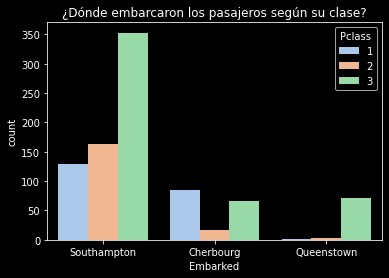

In [147]:
ax1 = sns.countplot(x="Embarked", hue="Pclass", data=df, palette="pastel")
plt.style.use("dark_background")
# ax1.bar_label(ax1.containers[0])
# ax1.bar_label(ax1.containers[1])
# ax1.bar_label(ax1.containers[2])
ax1.set_xticklabels(["Southampton", "Cherbourg", "Queenstown"])

ax1.set_title("¿Dónde embarcaron los pasajeros según su clase?");

<hr color="#FFA07A">

#### <span style="color:Lightsalmon"> Relaciones familiares de los pasajeros.</span>  

In [148]:
fig_SibSp=px.pie(df, values=df["SibSp"].value_counts(),color_discrete_sequence=px.colors.sequential.RdBu,
title="Pasajeros que viajan con conyuges y/o hermanos a bordo")
fig_SibSp.update_traces(textposition="outside", textinfo="percent+label")


In [149]:
fig_Parch=px.pie(df, values=df["Parch"].value_counts(),color_discrete_sequence=px.colors.sequential.RdBu,
title="Pasajeros que viajan con padres y/o hijos a bordo")
fig_Parch.update_traces(textposition="outside", textinfo="percent+label")

<hr color="#FFA07A">

#### <span style="color:Lightsalmon"> Veamos la probabilidad de superviviencia según las condiciones.</span>  

In [150]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [151]:
supervivientes = df.groupby(['Survived']).size().reset_index(name='counts')

fig_supervivientes =px.bar(supervivientes, x='Survived', y='counts',
labels={'Survived':'Survived','counts':'PassengersId'},
title="Pasajeros supervivientes del Titanic",
template="plotly_dark")
fig_supervivientes.show()



<hr color="#FFA07A">

#### <span style="color:Lightsalmon"> Veamos la probabilidad de superviviencia según la clase.</span>  

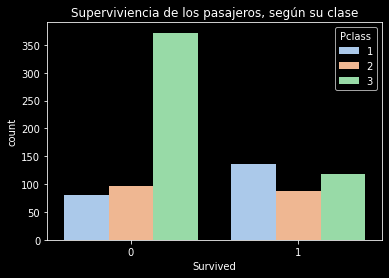

In [152]:
fig_supervivientes_clase = sns.countplot(x="Survived", hue="Pclass", data=df, palette="pastel")
plt.style.use("dark_background")

fig_supervivientes_clase .set_title("Superviviencia de los pasajeros, según su clase");

In [153]:
grupo_clase = df.groupby(["Pclass", "Survived"]).size().reset_index(name="counts")
grupo_clase

,Pclass,Survived,counts
0,1,0,80
1,1,1,136
2,2,0,97
3,2,1,87
4,3,0,372
5,3,1,119


In [154]:
grupo_clase["probability"] = grupo_clase.apply(lambda row: row.counts / grupo_clase[grupo_clase.Pclass == row.Pclass]["counts"].sum()*100, axis=1).round(2)
grupo_clase["probability"]

0    37.04
1    62.96
2    52.72
3    47.28
4    75.76
5    24.24
Name: probability, dtype: float64

In [155]:
fig_supervivientes_clase2 = px.bar(grupo_clase, x="Pclass", y="probability",
color="Survived", labels={"Pclass":"Clase","probability":"Probabilidad de sobrevivir"},
text_auto=True,
title="Probabilidad de sobrevivir en el Titanic según la clase")
fig_supervivientes_clase2.show()

<hr color="#FFA07A">

#### <span style="color:Lightsalmon"> Probabilidad de superviviencia según el puerto que embarcaron los pasajeros.</span>  

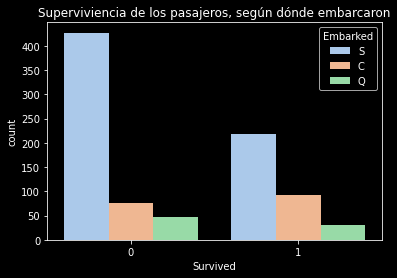

In [156]:
fig_supervivientes_embarque = sns.countplot(x="Survived", hue="Embarked", data=df, palette="pastel")
plt.style.use("dark_background")
#fig_supervivientes_embarque.set_hueticklabels(["Southampton", "Cherbourg", "Queenstown"])
fig_supervivientes_embarque .set_title("Superviviencia de los pasajeros, según dónde embarcaron");

In [157]:
grupo_embarque = df.groupby(["Embarked", "Survived"]).size().reset_index(name="counts")
grupo_embarque

,Embarked,Survived,counts
0,C,0,75
1,C,1,93
2,Q,0,47
3,Q,1,30
4,S,0,427
5,S,1,219


In [158]:
grupo_embarque["probability"] = grupo_embarque.apply(lambda row: row.counts / grupo_embarque[grupo_embarque.Embarked == row.Embarked]["counts"].sum()*100, axis=1).round(2)
grupo_embarque["probability"]

0    44.64
1    55.36
2    61.04
3    38.96
4    66.10
5    33.90
Name: probability, dtype: float64

In [159]:
fig_supervivientes_embarque2 = px.bar(grupo_embarque, x="Embarked", y="probability",
color="Survived", labels={"Embarked":"Puerto de Embarque","probability":"Probabilidad de sobrevivir"},
text_auto=True,
title="Probabilidad de sobrevivir en el Titanic, según el puerto de embarque")
fig_supervivientes_embarque2.show()

<hr color="#FFA07A">

#### <span style="color:Lightsalmon"> Vamos a crear una nueva columna "viajando_solos" con 1 si viajaba solo y 0 si no.</span>  

In [160]:
pasajeros_solitarios = df.loc[(df["SibSp"] == 0) & (df["Parch"] == 0)]
pasajeros_solitarios

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.92,S
5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.05,S
6,0,3,"Moran, Mr. James",male,25.14062,0,0,330877,8.46,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.00000,0,0,17463,51.86,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58.00000,0,0,113783,26.55,S
...,...,...,...,...,...,...,...,...,...,...
885,0,3,"Sutehall, Mr. Henry Jr",male,25.00000,0,0,SOTON/OQ 392076,7.05,S
887,0,2,"Montvila, Rev. Juozas",male,27.00000,0,0,211536,13.00,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.00000,0,0,112053,30.00,S


In [161]:
df["viajando_solos"] = df.apply(lambda row: 1 if row.SibSp == 0 and row.Parch == 0 else 0, axis=1)

In [162]:
df.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,viajando_solos
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C,0


In [163]:
solitarios = df.groupby(["viajando_solos", "Survived"]).size().reset_index(name='counts')
solitarios

,viajando_solos,Survived,counts
0,0,0,175
1,0,1,179
2,1,0,374
3,1,1,163


In [164]:
solitarios["probability"] = solitarios.apply(lambda row: row.counts / solitarios[solitarios.viajando_solos == row.viajando_solos]['counts'].sum()*100, axis=1).round(2)

In [165]:
fig_supervivientes_solos = px.bar(solitarios, x="viajando_solos", y="probability",
text_auto=True,
color="Survived", labels={"viajando_solos":"Viajan solos (0 = No , 1 = Sí)","probability":"Probabilidad de sobrevivir"},
title="Probabilidad de sobrevivir en el Titanic si viajas solo o no")
fig_supervivientes_solos.show()

<hr color="#FFA07A">

#### <span style="color:Lightsalmon"> Vamos a crear una nueva columna "rango_edad" para ver la posibilidad de sobrevivir según la edad.</span>  

In [166]:
# Crear bins de edad
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
df["rango_edad"] = pd.cut(df["Age"], bins).astype(str)

In [167]:
edades = df.groupby(["rango_edad", "Survived"]).size().reset_index(name="counts")
edades

,rango_edad,Survived,counts
0,"(0, 10]",0,26
1,"(0, 10]",1,38
2,"(10, 20]",0,71
3,"(10, 20]",1,44
4,"(20, 30]",0,255
5,"(20, 30]",1,122
6,"(30, 40]",0,102
7,"(30, 40]",1,83
8,"(40, 50]",0,53
9,"(40, 50]",1,33


In [168]:
edades["probability"] = edades.apply(lambda row: row.counts / edades[edades.rango_edad == row.rango_edad]["counts"].sum()*100, axis=1).round(2)

In [169]:
fig_supervivientes_edad = px.histogram(edades, x="rango_edad", y="probability", color="Survived",
histfunc="avg", title="Probabilidad de sobrevivir en el Titanic, según tu edad", nbins=8,
text_auto=True,
labels={"rango_edad":"Rango de edades","probability":"Probabilidad de sobrevivir"})
fig_supervivientes_edad.show()

<hr color="#FFA07A">

#### <span style="color:Lightsalmon"> Veamos la posibilidad de sobrevivir según el género.</span>  

In [170]:
grupo_genero = df.groupby(["Sex", "Survived"]).size().reset_index(name="counts")
grupo_genero

,Sex,Survived,counts
0,female,0,81
1,female,1,233
2,male,0,468
3,male,1,109


In [171]:
grupo_genero["probability"] = grupo_genero.apply(lambda row: row.counts / grupo_genero[grupo_genero.Sex == row.Sex]["counts"].sum()*100, axis=1).round(2)
grupo_genero["probability"]

0    25.80
1    74.20
2    81.11
3    18.89
Name: probability, dtype: float64

In [172]:
fig_supervivientes_genero = px.bar(grupo_genero, x="Sex", y="probability",
color="Survived", labels={"Sex":"Género",'probability':"Probabilidad de sobrevivir"},
text_auto=True,
title="Probabilidad de sobrevivir en el Titanic según tu género")
fig_supervivientes_genero.show()

<hr color="#FFA07A">

In [173]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,viajando_solos,rango_edad
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S,0,"(20, 30]"
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C,0,"(30, 40]"
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92,S,1,"(20, 30]"
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,S,0,"(30, 40]"
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,S,1,"(30, 40]"


<hr color="#FFA07A">

#### <span style="color:Lightsalmon"> Tabla relplot para comparar el precio del billete según los años y si sobrevivieron o no.</span>  

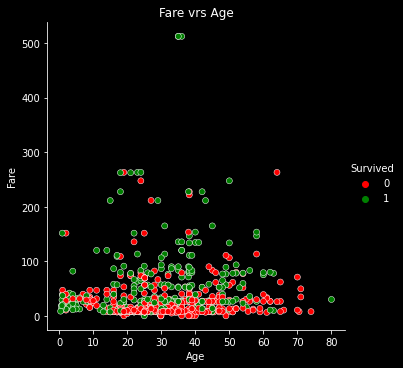

In [174]:
holat=sns.relplot(data=df,x="Age", y="Fare", hue="Survived",palette=["r", "g"]).set(title="Fare vrs Age",xlabel='Age',ylabel='Fare')

<hr color="#FFA07A">

#### <span style="color:Lightsalmon"> Tabla scatter para comparar la distribución de la edad respecto a la clase.</span>  

In [175]:
figg= px.scatter(df,x="Age", y="Pclass", color="Survived")
figg.show()

<hr color="#FFA07A">

#### <span style="color:Lightsalmon"> Aquí comparamos la distribución de la edad respecto al precio del billete.</span>  

In [176]:
#fig_scatter_sur= px.scatter(df,x="Age", y="Fare", color="Survived")
fig_scatter_sur= px.scatter(df,x="Age", y="Fare", color="Survived")
fig_scatter_sur.show()

<hr color="#FFA07A">

#### <span style="color:Lightsalmon"> Aquí comparamos la distribución de la edad respecto al precio del billete según el género.</span>  

In [177]:
fig_scatter_sex= px.scatter(df,x="Age", y="Fare", color="Sex")
fig_scatter_sex.show()

<hr color="#FFA07A">

#### <span style="color:Lightsalmon"> Aquí comparamos la distribución de la edad respecto al puerto donde embarcaron.</span>  

In [178]:
figg= px.scatter(df,x="Age", y="Embarked", color="Survived")
figg.show()

<hr color="#FFA07A">

In [179]:
df.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,viajando_solos,rango_edad
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S,0,"(20, 30]"
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C,0,"(30, 40]"


#### <span style="color:Lightsalmon"> Mostramos una gráfica px.scatter_3d para comparar el precio del billete, con la edad y el sitio de embarque. </span>  

In [180]:
pasajeros=len(df)
fig_3d= px.scatter_3d(df, x="Age", y="Embarked", z="Fare", color="Age")
fig_3d.show()

<hr color="#FFA07A">

#### <span style="color:Lightsalmon"> Mostramos una gráfica lmplot para comparar el precio del billete, con la edad y género. </span>  

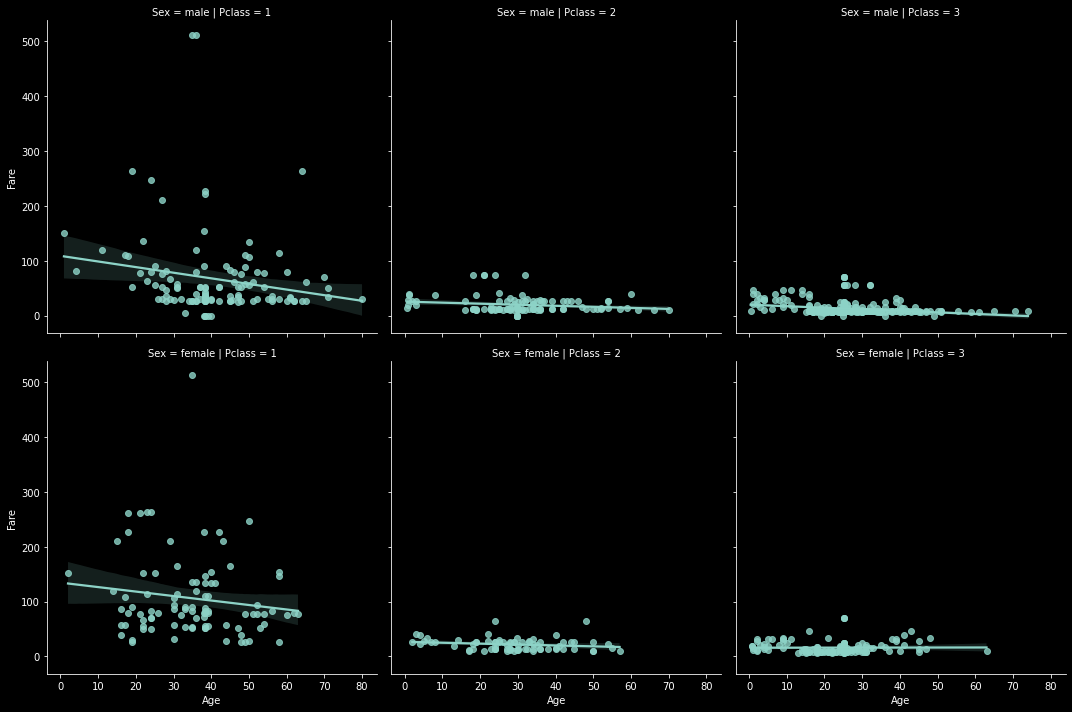

In [181]:
sns.lmplot(x="Age", y="Fare", row="Sex", col="Pclass",data=df);

<hr color="#FFA07A">

#### <span style="color:Lightsalmon">Con esta gráfica por niveles observamos muchos detalles y profundizamos lo que queramos </span>  

In [182]:
fig_rara2 = px.sunburst(df, path=['Sex',"Survived", 'Pclass', "Embarked"], values=df.index)
fig_rara2.update_layout(title_text = "Diagrama de pastel por niveles", title_x = 0.5)
fig_rara2.show()

# Se llama diagrama de pastel de niveles

<hr color="#FFA07A">

#### <span style="color:Lightsalmon">Mapa de calor </span>  

In [183]:
# Crea la matriz de datos con la información que quieres visualizar
matrix = df.pivot_table(index="Embarked", columns="Sex", aggfunc="size").fillna(0).values

# Crea una figura con px.imshow
fig_calor = px.imshow(matrix, title='Número de pasajeros',
labels={"Sex": "Tarifa (en libras)", "Embarked": "Ciudad de embarque"})



# Muestra la figura
fig_calor.show()

<hr color="#FFA07A">

<hr color="#FFA07A">

In [184]:
df.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,viajando_solos,rango_edad
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S,0,"(20, 30]"
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C,0,"(30, 40]"


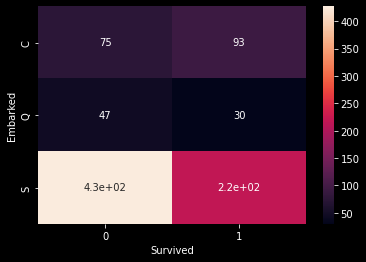

In [185]:
supervivencia1=pd.crosstab(df['Embarked'], df['Survived'])
grf=sns.heatmap(supervivencia1,annot=True)

## MODELO DE PREDICCIÓN DE SUPERVIVENCIA

In [186]:
# Importamos librerías de regresión

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [187]:
df.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,viajando_solos,rango_edad
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S,0,"(20, 30]"
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C,0,"(30, 40]"


In [188]:
#Convertimos las columnas categóricas en numéricas

df.replace({'Sex':{'male': 0, 'female':1}, 'Embarked':{'S':0, 'C':1, 'Q':2}}, inplace=True)


In [189]:
df.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,viajando_solos,rango_edad
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.25,0,0,"(20, 30]"
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.28,1,0,"(30, 40]"


<hr color="#FFA07A">

In [190]:
# Asignamos las variables independientes y la variable dependiente

X = df.drop(columns=["Name", "Ticket", "Survived", "viajando_solos", "rango_edad"], axis=1)
y = df["Survived"]

In [191]:
print(X.head())
print(y.head())

             Pclass  Sex   Age  SibSp  Parch   Fare  Embarked
PassengerId                                                  
1                 3    0  22.0      1      0   7.25         0
2                 1    1  38.0      1      0  71.28         1
3                 3    1  26.0      0      0   7.92         0
4                 1    1  35.0      1      0  53.10         0
5                 3    0  35.0      0      0   8.05         0
PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64


<hr color="#FFA07A">

In [192]:
# Dividimos los datos en conjunto de entrenamiento y conjunto de prueba

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=14)

In [193]:
# Creamos una instancia del modelo de regresión logística
model = LogisticRegression()

In [194]:
# Entrenamos el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [195]:
# Hacemos predicciones con el conjunto de prueba
y_pred = model.predict(X_test)

In [196]:
# Evaluamos el modelo con la métrica de precisión
score = model.score(X_test, y_test)
print("Precisión: ", score)

Precisión:  0.8100558659217877


<hr color="#FFA07A">